# Alucar - Analisando as Vendas

In [1]:
import pandas as pd

In [2]:
alucar = pd.read_csv('dados/alucar.csv')

In [3]:
alucar.head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


In [4]:
print(f'Quantidade de linhas e colunas: {alucar.shape}')

Quantidade de linhas e colunas: (24, 2)


In [5]:
print('Quantidade de dados nulos:', alucar.isna().sum().sum())

Quantidade de dados nulos: 0


In [6]:
alucar.dtypes

mes       object
vendas     int64
dtype: object

In [7]:
alucar['mes'] = pd.to_datetime(alucar['mes'])
alucar.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [8]:
alucar.head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


In [10]:
%matplotlib inline
import seaborn as sns
from matplotlib import pyplot as plt

<AxesSubplot:xlabel='mes', ylabel='vendas'>

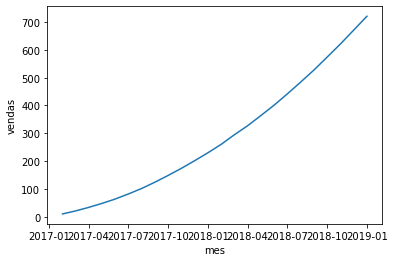

In [11]:
sns.lineplot(x='mes', y = 'vendas', data = alucar)

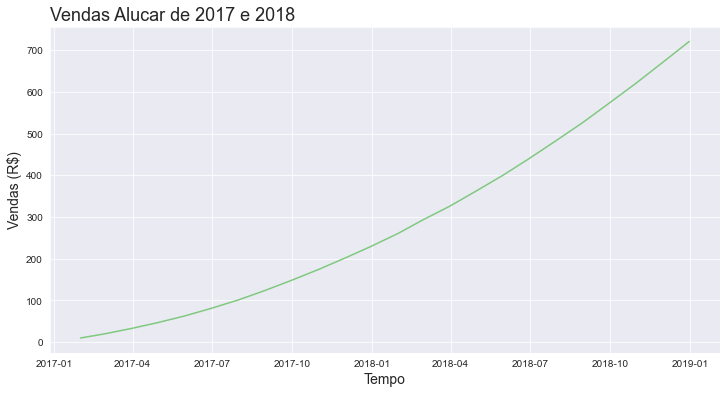

In [18]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.lineplot(x='mes', y = 'vendas', data = alucar)
ax.figure.set_size_inches(12, 6)
ax.set_title("Vendas Alucar de 2017 e 2018", loc = 'left', fontsize=18)
ax.set_xlabel('Tempo', fontsize = 14)
ax.set_ylabel('Vendas (R$)', fontsize = 14)
ax = ax

In [19]:
alucar['aumento'] = alucar['vendas'].diff()
alucar.head()

,mes,vendas,aumento
0,2017-01-31,10,NaN
1,2017-02-28,20,10.0
2,2017-03-31,33,13.0
3,2017-04-30,47,14.0
4,2017-05-31,63,16.0


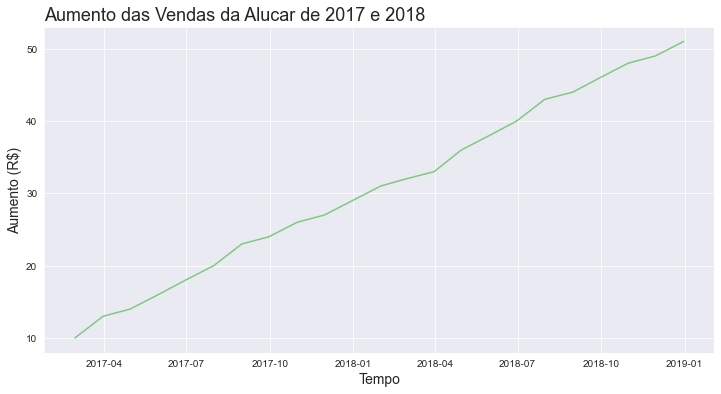

In [21]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.lineplot(x='mes', y = 'aumento', data = alucar)
ax.figure.set_size_inches(12, 6)
ax.set_title("Aumento das Vendas da Alucar de 2017 e 2018", loc = 'left', fontsize=18)
ax.set_xlabel('Tempo', fontsize = 14)
ax.set_ylabel('Aumento (R$)', fontsize = 14)
ax = ax

In [24]:
def plotar(titulo, labelx, labely, x, y, dataset):
    sns.set_palette('Accent')
    sns.set_style('darkgrid')
    ax = sns.lineplot(x=x, y = y, data = dataset)
    ax.figure.set_size_inches(12, 6)
    ax.set_title(titulo, loc = 'left', fontsize=18)
    ax.set_xlabel(labelx, fontsize = 14)
    ax.set_ylabel(labely, fontsize = 14)
    ax = ax

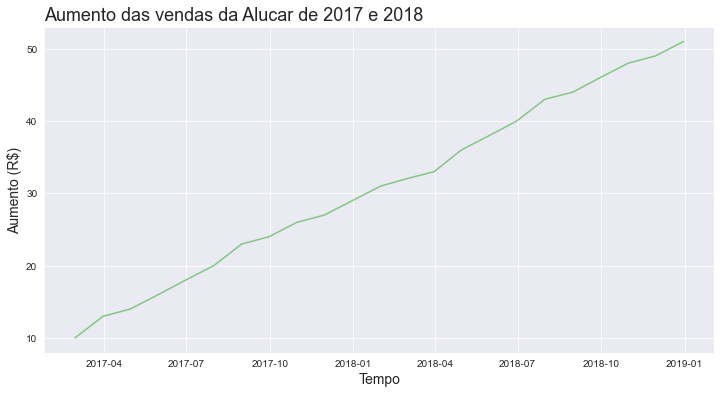

In [25]:
plotar('Aumento das vendas da Alucar de 2017 e 2018', 'Tempo', 'Aumento (R$)', 'mes', 'aumento', alucar)

In [26]:
alucar['aceleracao'] = alucar['aumento'].diff()
alucar.head()

,mes,vendas,aumento,aceleracao
0,2017-01-31,10,NaN,NaN
1,2017-02-28,20,10.0,NaN
2,2017-03-31,33,13.0,3.0
3,2017-04-30,47,14.0,1.0
4,2017-05-31,63,16.0,2.0


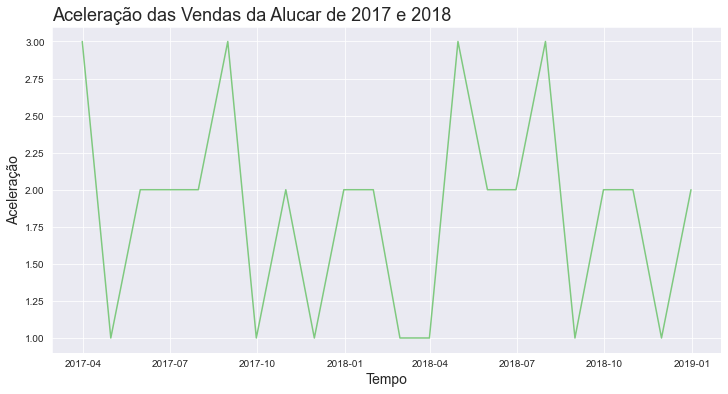

In [27]:
plotar("Aceleração das Vendas da Alucar de 2017 e 2018", 'Tempo', 'Aceleração', 'mes', 'aceleracao', alucar)

<AxesSubplot:xlabel='mes', ylabel='aceleracao'>

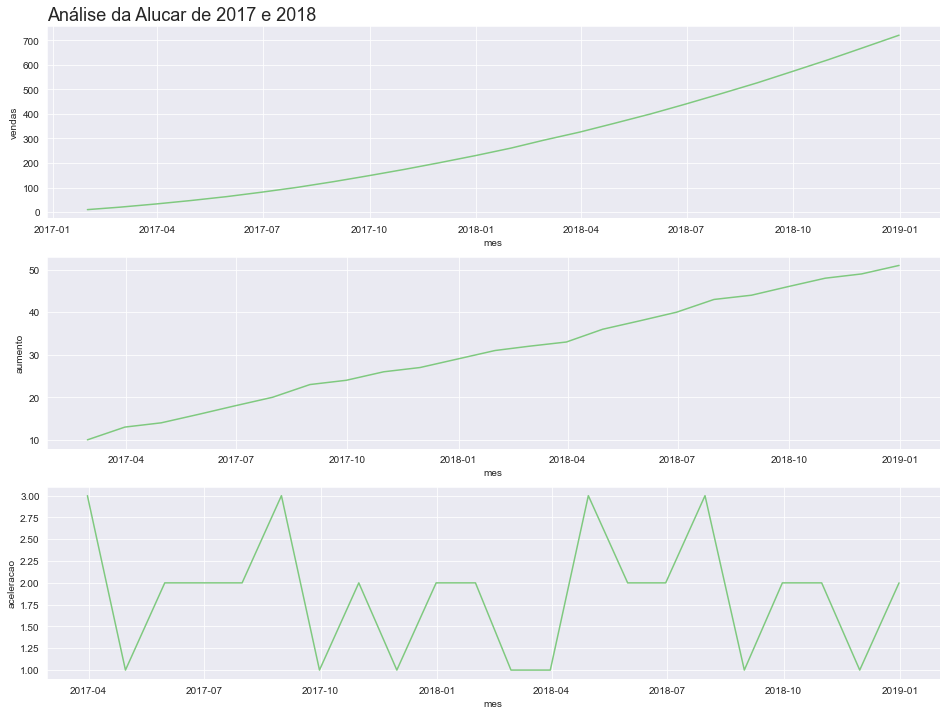

In [28]:
plt.figure(figsize=(16, 12))
ax = plt.subplot(3, 1, 1)
ax.set_title('Análise da Alucar de 2017 e 2018', fontsize = 18, loc = 'left')
sns.lineplot(x='mes', y='vendas', data=alucar)
plt.subplot(3, 1, 2)
sns.lineplot(x='mes', y='aumento', data=alucar)
plt.subplot(3, 1, 3)
sns.lineplot(x='mes', y='aceleracao', data=alucar)

In [29]:
def plot_comparacao(x, y1, y2, y3, dataset, titulo):
    plt.figure(figsize=(16, 12))
    ax = plt.subplot(3, 1, 1)
    ax.set_title(titulo, fontsize = 18, loc = 'left')
    sns.lineplot(x=x, y=y1, data=dataset)
    plt.subplot(3, 1, 2)
    sns.lineplot(x=x, y=y2, data=dataset)
    plt.subplot(3, 1, 3)
    sns.lineplot(x=x, y=y3, data=dataset)

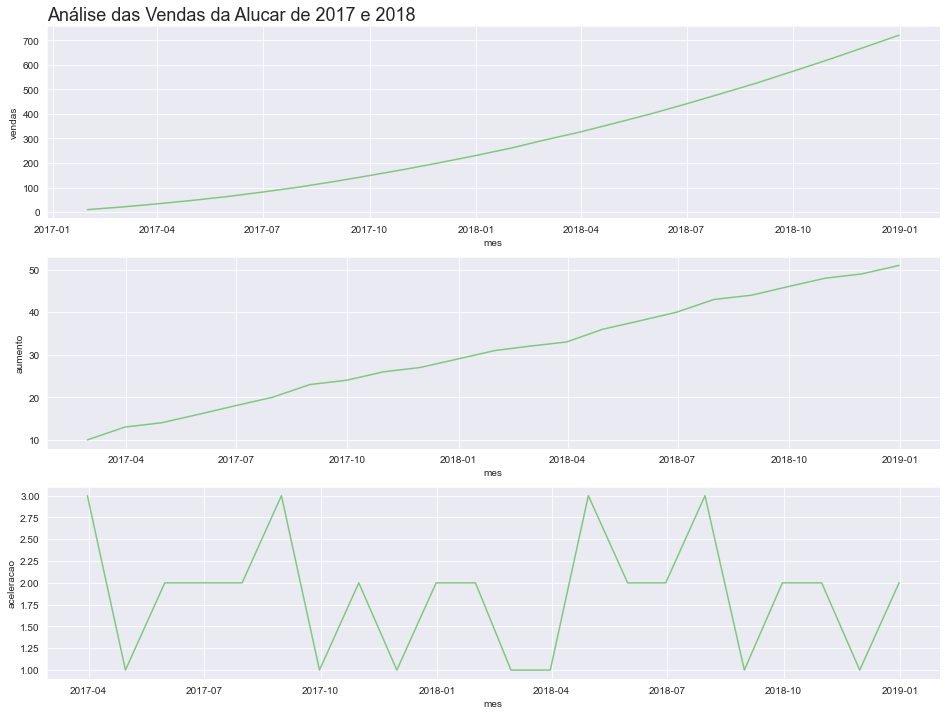

In [31]:
plot_comparacao('mes', 'vendas', 'aumento', 'aceleracao', alucar, 'Análise das Vendas da Alucar de 2017 e 2018')

In [32]:
from pandas.plotting import autocorrelation_plot

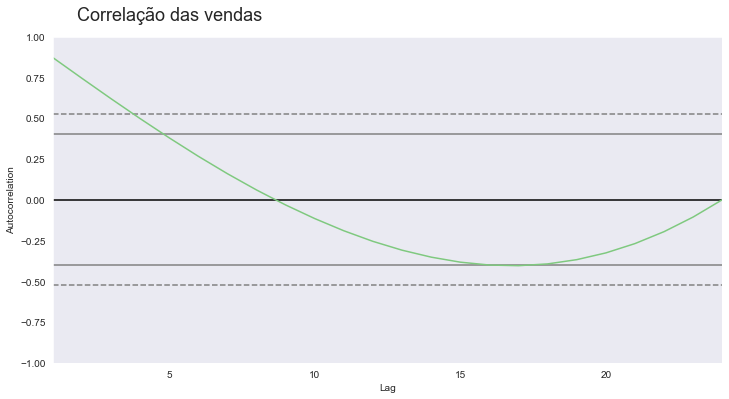

In [39]:
ax = plt.figure(figsize=(12, 6))
ax.suptitle('Correlação das vendas', fontsize=18, x=0.26, y=0.95)
autocorrelation_plot(alucar['vendas'])
ax = ax

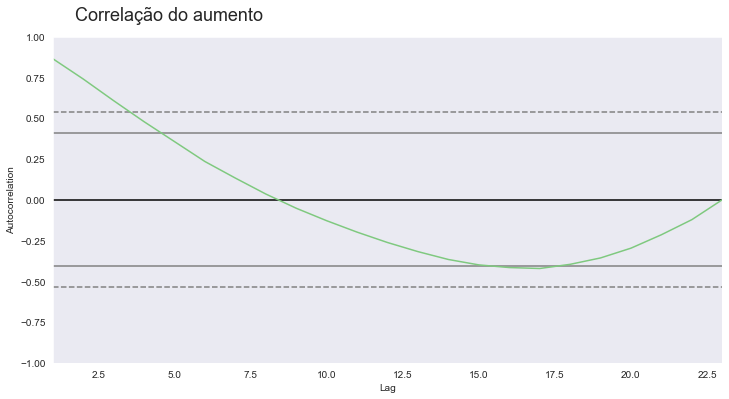

In [41]:
ax = plt.figure(figsize=(12, 6))
ax.suptitle('Correlação do aumento', fontsize=18, x=0.26, y=0.95)
autocorrelation_plot(alucar['aumento'][1:])
ax = ax

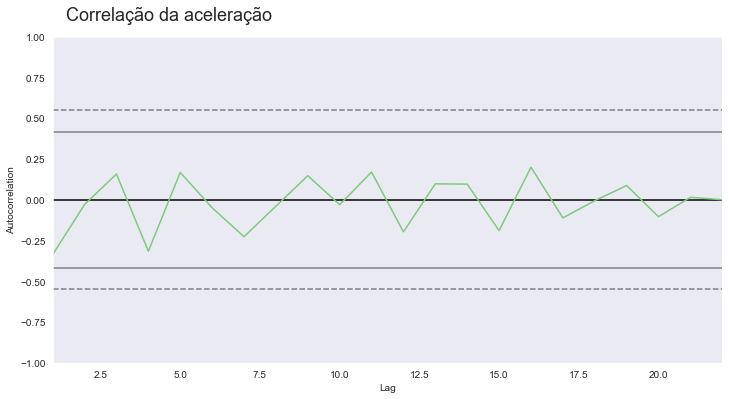

In [42]:
ax = plt.figure(figsize=(12, 6))
ax.suptitle('Correlação da aceleração', fontsize=18, x=0.26, y=0.95)
autocorrelation_plot(alucar['aceleracao'][2:])
ax = ax

# Alucar - Analisando assinantes da newsletter

In [43]:
assinantes = pd.read_csv('dados/newsletter_alucar.csv')

In [44]:
assinantes.head()

,mes,assinantes
0,2017-01-31,0
1,2017-02-28,10
2,2017-03-31,21
3,2017-04-30,34
4,2017-05-31,49


In [45]:
assinantes.dtypes

mes           object
assinantes     int64
dtype: object

In [46]:
print('Quantidade de linhas e colunas:', assinantes.shape)

Quantidade de linhas e colunas: (24, 2)


In [47]:
print('Quantidade de dados nulos:', assinantes.isna().sum().sum())

Quantidade de dados nulos: 0


In [48]:
assinantes['mes'] = pd.to_datetime(assinantes['mes'])
assinantes.dtypes

mes           datetime64[ns]
assinantes             int64
dtype: object

In [49]:
assinantes['aumento'] = assinantes['assinantes'].diff()

In [50]:
assinantes['aceleracao'] = assinantes['aumento'].diff()

In [51]:
assinantes.head()

,mes,assinantes,aumento,aceleracao
0,2017-01-31,0,NaN,NaN
1,2017-02-28,10,10.0,NaN
2,2017-03-31,21,11.0,1.0
3,2017-04-30,34,13.0,2.0
4,2017-05-31,49,15.0,2.0


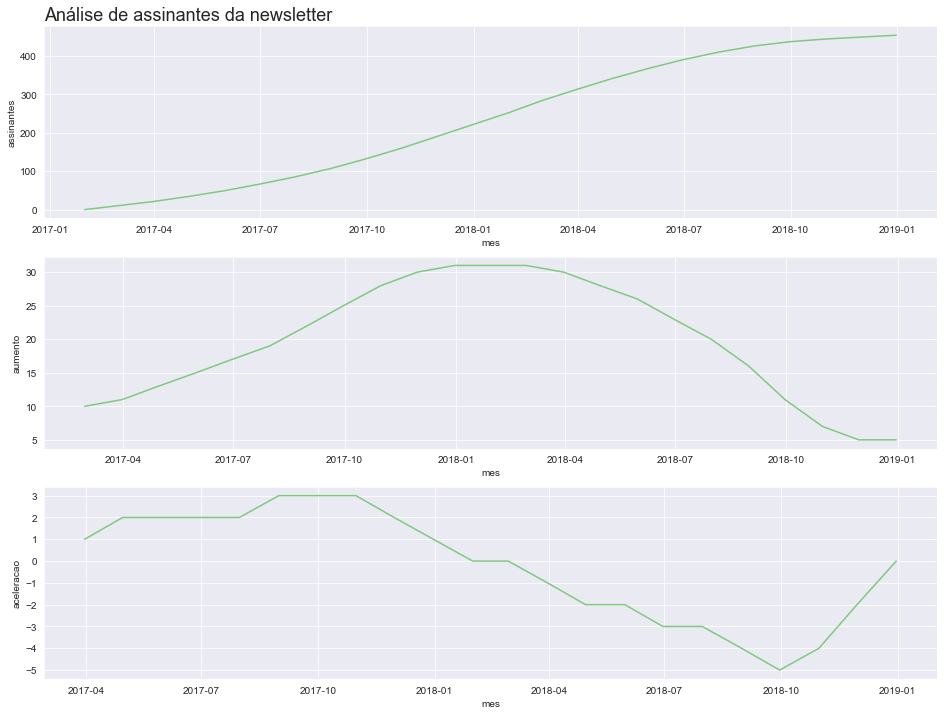

In [52]:
plot_comparacao('mes', 'assinantes', 'aumento', 'aceleracao', assinantes, 'Análise de assinantes da newsletter')

# Chocolura - Analisando as vendas

In [53]:
chocolura = pd.read_csv('dados/chocolura.csv')
chocolura.head()

,mes,vendas
0,2017-01,210
1,2017-02,185
2,2017-03,209
3,2017-04,280
4,2017-05,211


In [54]:
chocolura.dtypes

mes       object
vendas     int64
dtype: object

In [55]:
chocolura.mes = pd.to_datetime(chocolura['mes'])
chocolura.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [56]:
print('Quantidade de linhas e colunas:', chocolura.shape)

Quantidade de linhas e colunas: (24, 2)


In [57]:
print('Quantidade de dados nulos:', chocolura.isna().sum().sum())

Quantidade de dados nulos: 0


In [59]:
chocolura['aumento'] = chocolura['vendas'].diff()
chocolura['aceleracao'] = chocolura['aumento'].diff()
chocolura.head()

,mes,vendas,aumento,aceleracao
0,2017-01-01,210,NaN,NaN
1,2017-02-01,185,-25.0,NaN
2,2017-03-01,209,24.0,49.0
3,2017-04-01,280,71.0,47.0
4,2017-05-01,211,-69.0,-140.0


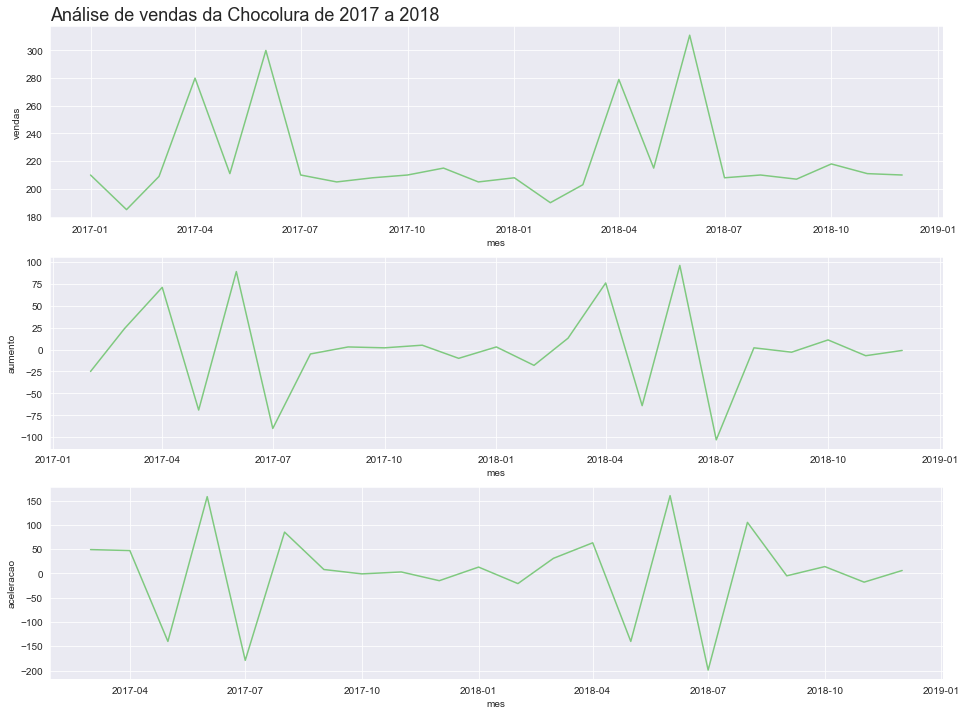

In [60]:
plot_comparacao('mes', 'vendas', 'aumento', 'aceleracao', chocolura, 'Análise de vendas da Chocolura de 2017 a 2018')

# Chocolura - Vendas diárias(Outubro e Novembro)

In [62]:
vendas_por_dia = pd.read_csv('dados/vendas_por_dia.csv')

In [63]:
vendas_por_dia.head()

,dia,vendas
0,2018-10-01,50
1,2018-10-02,48
2,2018-10-03,56
3,2018-10-04,50
4,2018-10-05,51


In [64]:
print('Quantidade de linhas e colunas:', vendas_por_dia.shape)

Quantidade de linhas e colunas: (61, 2)


In [65]:
print('Quantidade de dados nulos:', vendas_por_dia.isna().sum().sum())

Quantidade de dados nulos: 0


In [67]:
vendas_por_dia.dia = pd.to_datetime(vendas_por_dia['dia'])
vendas_por_dia.dtypes

dia       datetime64[ns]
vendas             int64
dtype: object

In [68]:
vendas_por_dia['aumento'] = vendas_por_dia['vendas'].diff()
vendas_por_dia['aceleracao'] = vendas_por_dia['aumento'].diff()
vendas_por_dia.head()

,dia,vendas,aumento,aceleracao
0,2018-10-01,50,NaN,NaN
1,2018-10-02,48,-2.0,NaN
2,2018-10-03,56,8.0,10.0
3,2018-10-04,50,-6.0,-14.0
4,2018-10-05,51,1.0,7.0


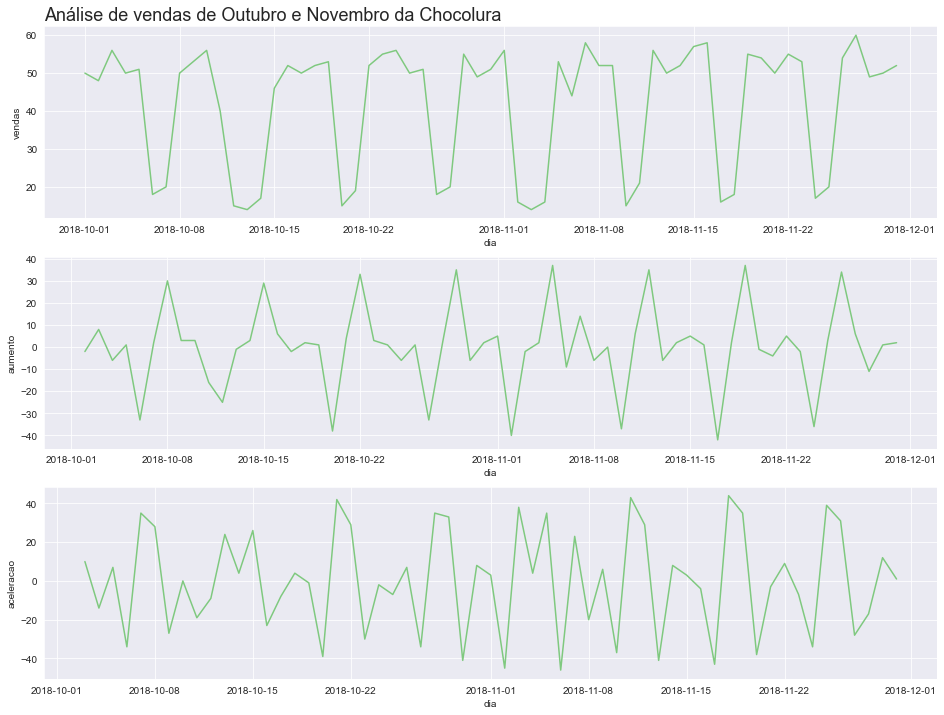

In [69]:
plot_comparacao('dia', 'vendas', 'aumento', 'aceleracao', vendas_por_dia, 'Análise de vendas de Outubro e Novembro da Chocolura')

**Analisando a Sazonalidade**

In [72]:
vendas_por_dia['dia_da_semana'] = vendas_por_dia['dia'].dt.day_name()

In [74]:
vendas_por_dia.head(7)

,dia,vendas,aumento,aceleracao,dia_da_semana
0,2018-10-01,50,NaN,NaN,Monday
1,2018-10-02,48,-2.0,NaN,Tuesday
2,2018-10-03,56,8.0,10.0,Wednesday
3,2018-10-04,50,-6.0,-14.0,Thursday
4,2018-10-05,51,1.0,7.0,Friday
5,2018-10-06,18,-33.0,-34.0,Saturday
6,2018-10-07,20,2.0,35.0,Sunday


In [75]:
vendas_por_dia['dia_da_semana'].unique()

array(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday'], dtype=object)

In [76]:
dias_traduzidos = {'Monday': 'Segunda', 
                   'Tuesday' : 'Terça', 
                   'Wednesday':'Quarta', 
                   'Thursday':'Quinta', 
                   'Friday':'Sexta', 
                   'Saturday':'Sábado', 
                   'Sunday':'Domingo'}

In [77]:
vendas_por_dia.dia_da_semana = vendas_por_dia.dia_da_semana.map(dias_traduzidos)

In [78]:
vendas_por_dia.head(7)

,dia,vendas,aumento,aceleracao,dia_da_semana
0,2018-10-01,50,NaN,NaN,Segunda
1,2018-10-02,48,-2.0,NaN,Terça
2,2018-10-03,56,8.0,10.0,Quarta
3,2018-10-04,50,-6.0,-14.0,Quinta
4,2018-10-05,51,1.0,7.0,Sexta
5,2018-10-06,18,-33.0,-34.0,Sábado
6,2018-10-07,20,2.0,35.0,Domingo


**Agrupando os dias**

In [80]:
vendas_agrupadas = vendas_por_dia.groupby('dia_da_semana')[['vendas', 'aumento', 'aceleracao']].mean().round()

In [81]:
vendas_agrupadas

,vendas,aumento,aceleracao
dia_da_semana,,,
Domingo,19.0,3.0,31.0
Quarta,53.0,1.0,2.0
Quinta,51.0,-2.0,-3.0
Segunda,52.0,34.0,31.0
Sexta,45.0,-7.0,-5.0
Sábado,16.0,-28.0,-20.0
Terça,52.0,-1.0,-34.0
